In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [19]:
df = pd.read_csv('data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [79]:
top_10_df = pd.read_csv('top_10_zipcodes.csv')
top_10_df

,Unnamed: 0,zip,npv_13_17,county_name,2020_mean_fmr,2019_mean_fmr,2018_mean_fmr,2017_mean_fmr,2016_mean_fmr,2015_mean_fmr,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,0,10021,2149243.13,New York County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,...,18889900,18703500,18605300,18569400,18428800,18307100,18365900,18530400,18337700,17894900
1,1,94027,1118915.83,San Mateo County CA,3455.6,3269.0,3210.0,3220.0,2411.6,2228.0,...,6138300,6197800,6250200,6315400,6429100,6581800,6705000,6764600,6788400,6796500
2,2,90210,983966.21,Los Angeles County CA,2044.6,1875.0,1742.4,1622.0,1565.4,1502.2,...,5339400,5397000,5450400,5503000,5574100,5661000,5738200,5816100,5907800,5956700
3,3,94301,847246.21,Santa Clara County CA,3199.8,3066.0,2735.8,2424.6,2159.8,1976.8,...,4188300,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400
4,4,10011,822176.95,New York County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
5,5,94022,743588.06,Santa Clara County CA,3199.8,3066.0,2735.8,2424.6,2159.8,1976.8,...,3730400,3793300,3866800,3951900,4045200,4118000,4170500,4235700,4321900,4372600
6,6,11217,704749.61,Kings County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,...,3405900,3442900,3443800,3426000,3407000,3404100,3413800,3482900,3588100,3656000
7,7,11238,695663.87,Kings County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,...,2673300,2696700,2716500,2724000,2744300,2768900,2810700,2848100,2869600,2885300
8,8,94970,674581.37,Marin County CA,3455.6,3269.0,3210.0,3220.0,2411.6,2228.0,...,2586000,2614800,2585900,2536700,2511500,2492300,2488000,2558700,2646500,2678700
9,9,94040,668975.44,Santa Clara County CA,3199.8,3066.0,2735.8,2424.6,2159.8,1976.8,...,2367600,2418700,2478700,2541700,2609400,2669000,2718200,2770500,2820300,2839500


In [80]:
top_10_df.drop(top_10_df.columns[0], axis=1, inplace=True)

In [81]:
top_10_df.drop(top_10_df.columns[13:118], axis=1, inplace=True)

In [82]:
top_10_df

,zip,npv_13_17,county_name,2020_mean_fmr,2019_mean_fmr,2018_mean_fmr,2017_mean_fmr,2016_mean_fmr,2015_mean_fmr,2014_mean_fmr,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,10021,2149243.13,New York County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,1549.0,...,18889900,18703500,18605300,18569400,18428800,18307100,18365900,18530400,18337700,17894900
1,94027,1118915.83,San Mateo County CA,3455.6,3269.0,3210.0,3220.0,2411.6,2228.0,2113.4,...,6138300,6197800,6250200,6315400,6429100,6581800,6705000,6764600,6788400,6796500
2,90210,983966.21,Los Angeles County CA,2044.6,1875.0,1742.4,1622.0,1565.4,1502.2,1474.6,...,5339400,5397000,5450400,5503000,5574100,5661000,5738200,5816100,5907800,5956700
3,94301,847246.21,Santa Clara County CA,3199.8,3066.0,2735.8,2424.6,2159.8,1976.8,1801.6,...,4188300,4247600,4319300,4401100,4481700,4544700,4595100,4668700,4762600,4818400
4,10011,822176.95,New York County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,1549.0,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
5,94022,743588.06,Santa Clara County CA,3199.8,3066.0,2735.8,2424.6,2159.8,1976.8,1801.6,...,3730400,3793300,3866800,3951900,4045200,4118000,4170500,4235700,4321900,4372600
6,11217,704749.61,Kings County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,1549.0,...,3405900,3442900,3443800,3426000,3407000,3404100,3413800,3482900,3588100,3656000
7,11238,695663.87,Kings County NY,2089.0,1957.6,1915.6,1755.4,1693.2,1592.8,1549.0,...,2673300,2696700,2716500,2724000,2744300,2768900,2810700,2848100,2869600,2885300
8,94970,674581.37,Marin County CA,3455.6,3269.0,3210.0,3220.0,2411.6,2228.0,2113.4,...,2586000,2614800,2585900,2536700,2511500,2492300,2488000,2558700,2646500,2678700
9,94040,668975.44,Santa Clara County CA,3199.8,3066.0,2735.8,2424.6,2159.8,1976.8,1801.6,...,2367600,2418700,2478700,2541700,2609400,2669000,2718200,2770500,2820300,2839500


In [84]:
top_10_df.columns[13]

'2005-01'

# Step 2: Data Preprocessing

In [6]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [9]:
time = get_datetimes(df)

In [10]:
time

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [94]:
def melt_data(df):
    melted = pd.melt(df, id_vars=list(df.columns[:13]), var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [88]:
melted_10 = melt_data(top_10_df)

In [90]:
melted_10

,value
time,
2005-01-01,2803940.0
2005-02-01,2850090.0
2005-03-01,2887580.0
2005-04-01,2912580.0
2005-05-01,2923470.0
...,...
2017-12-01,6249340.0
2018-01-01,6298350.0
2018-02-01,6352500.0


In [91]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

/Users/Vittorio/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


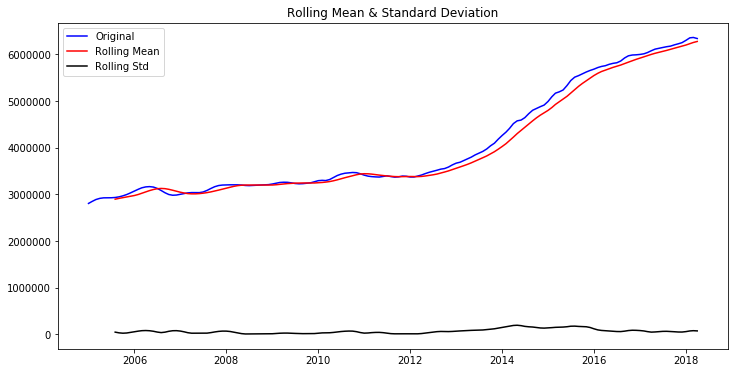

Results of Dickey-Fuller Test: 

Test Statistic                  -0.346098
p-value                          0.918717
#Lags Used                      13.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


In [95]:
stationarity_check(melted_10)

## Rolling Mean check

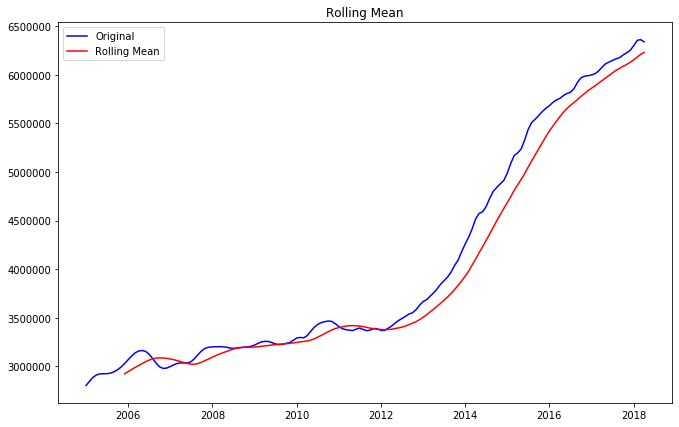

In [97]:
roll_mean = melted_10.rolling(window=12).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(melted_10, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.show(block=False)

In [98]:
data_minus_roll_mean = melted_10 - roll_mean
data_minus_roll_mean.head(15)

,value
time,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN
2005-05-01,NaN
2005-06-01,NaN
2005-07-01,NaN
2005-08-01,NaN
2005-09-01,NaN


In [99]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

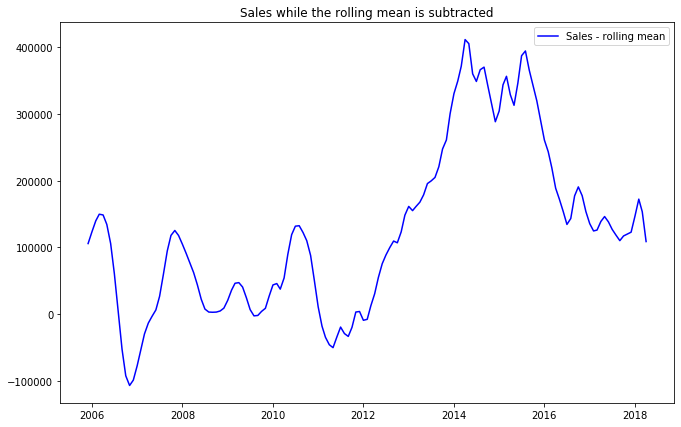

In [100]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

In [113]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data_minus_roll_mean['value'])
print('DF test results:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'n. Lags used', 'n. observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

DF test results:
Test Statistic           -1.662724
p-value                   0.450413
n. Lags used             13.000000
n. observations used    135.000000
Critical Value (1%)      -3.479743
Critical Value (5%)      -2.883198
Critical Value (10%)     -2.578320
dtype: float64


## Weighted Rolling Mean check

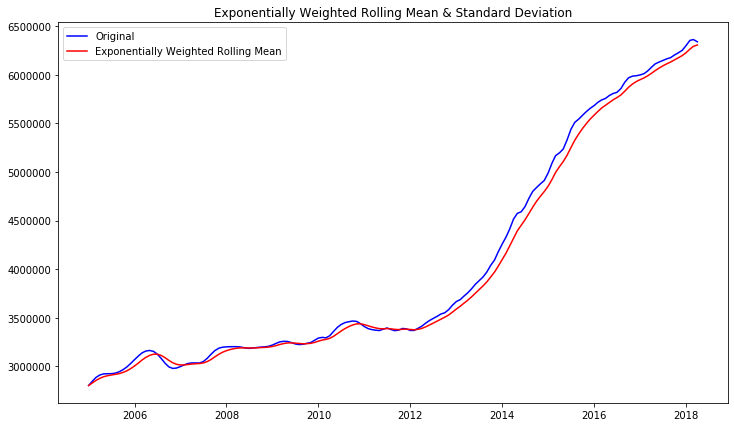

In [114]:
exp_roll_mean = melted_10.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(melted_10, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [115]:
# Subtract the moving average from the original data
data_minus_exp_roll_mean = melted_10 - exp_roll_mean
data_minus_exp_roll_mean.head(15)

,value
time,
2005-01-01,0.000000
2005-02-01,19115.955904
2005-03-01,30958.825286
2005-04-01,34105.544674
2005-05-01,28986.656397
2005-06-01,20394.797231
2005-07-01,14079.666944
2005-08-01,13634.493633
2005-09-01,19131.614493


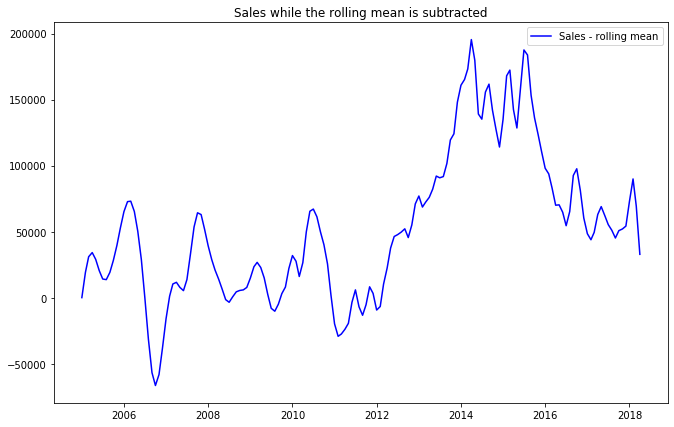

In [116]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

In [117]:
dftest = adfuller(data_minus_exp_roll_mean['value'])
print('DF test results:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'n. Lags used', 'n. observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

DF test results:
Test Statistic           -1.388732
p-value                   0.587666
n. Lags used             13.000000
n. observations used    146.000000
Critical Value (1%)      -3.475953
Critical Value (5%)      -2.881548
Critical Value (10%)     -2.577439
dtype: float64


worse than regular rolling mean, will try differencing.

In [157]:
data_diff = melted_10.diff(periods=6)
data_diff.dropna(inplace=True)
data_diff.head(10)


,value
time,
2005-07-01,121550.0
2005-08-01,81150.0
2005-09-01,57610.0
2005-10-01,53830.0
2005-11-01,71260.0
2005-12-01,105140.0
2006-01-01,144570.0
2006-02-01,176820.0
2006-03-01,193700.0


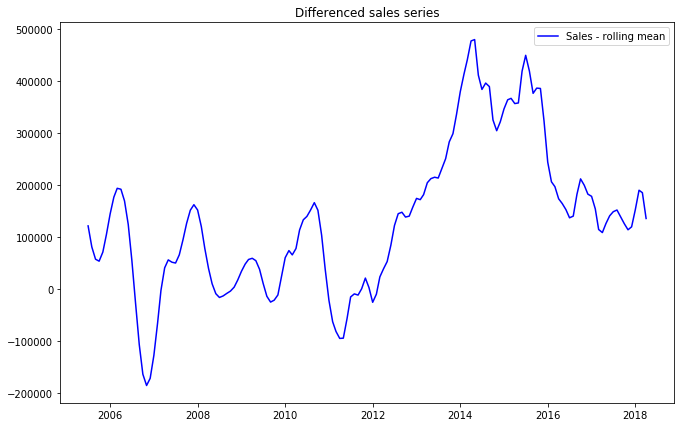

In [158]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [159]:
dftest = adfuller(data_diff['value'])
print('DF test results:')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'n. Lags used', 'n. observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

DF test results:
Test Statistic           -1.654270
p-value                   0.454815
n. Lags used             13.000000
n. observations used    140.000000
Critical Value (1%)      -3.477945
Critical Value (5%)      -2.882416
Critical Value (10%)     -2.577902
dtype: float64


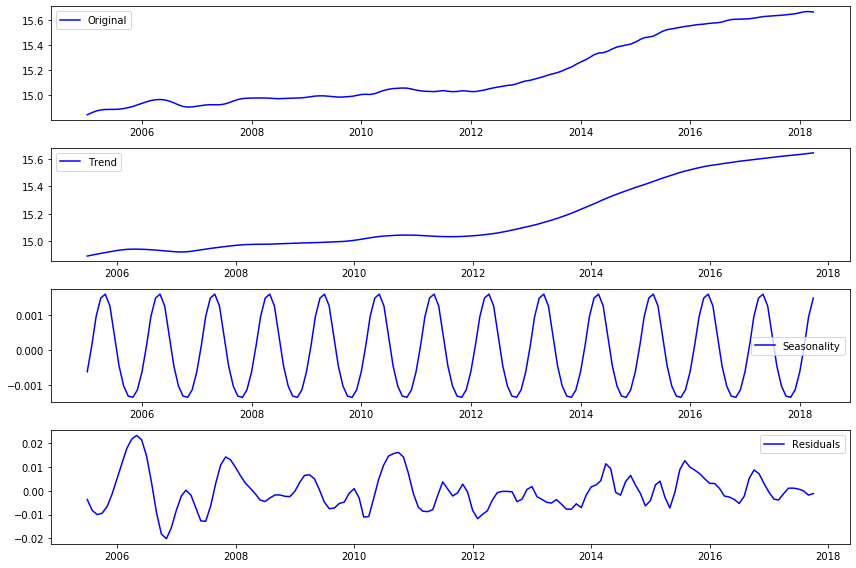

In [161]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(melted_10))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(melted_10), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

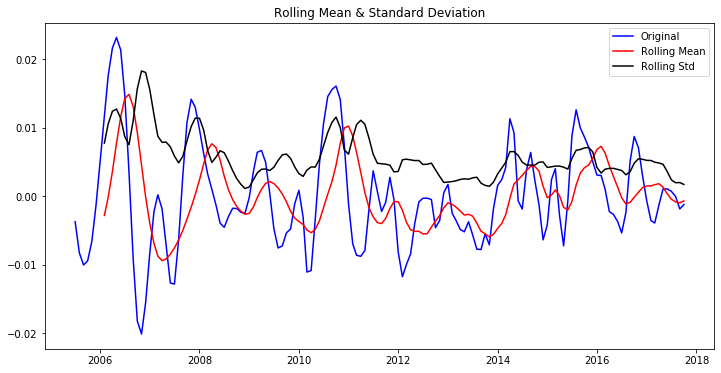

Results of Dickey-Fuller Test: 

Test Statistic                  -4.130537
p-value                          0.000862
#Lags Used                      13.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


In [165]:
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

/Users/Vittorio/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


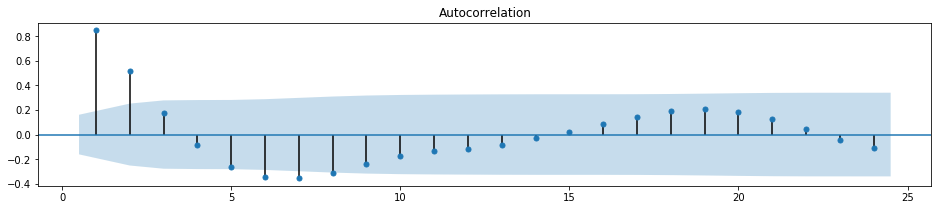

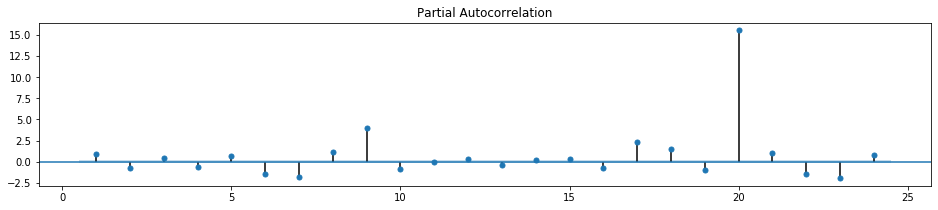

In [168]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts_log_decompose, ax=ax, lags=24, zero=False);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts_log_decompose, ax=ax, lags=24, zero=False);

# Step 5: ARIMA Modeling

In [171]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [174]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_log_decompose,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =-1012.0975213290816
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =-963.638644446308
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =-828.9300612393454
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =-840.0927889550717
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =-967.0732585742
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =-961.4273873309526
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =-816.7152092048331
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =-842.3297636872134
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =-1122.1709672822158
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =-1054.6910789536096
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =-933.0492846919346
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =-917.8768078990678
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =-1070.8175586362017
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =-1052.3397529214774
ARIMA

In [175]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 0, 0, 12)
aic          -1282.53
Name: 56, dtype: object

In [176]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data_diff, 
                                        order=(3, 0, 2), 
                                        seasonal_order=(0, 0, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7773      0.025     30.939      0.000       0.728       0.827
ar.L2          0.1281      0.019      6.595      0.000       0.090       0.166
ar.L3          0.0601      0.025      2.433      0.015       0.012       0.108
ma.L1          1.6593      0.038     43.337      0.000       1.584       1.734
ma.L2          1.0176      0.040     25.214      0.000       0.938       1.097
sigma2      2.454e+08    6.3e-11   3.89e+18      0.000    2.45e+08    2.45e+08


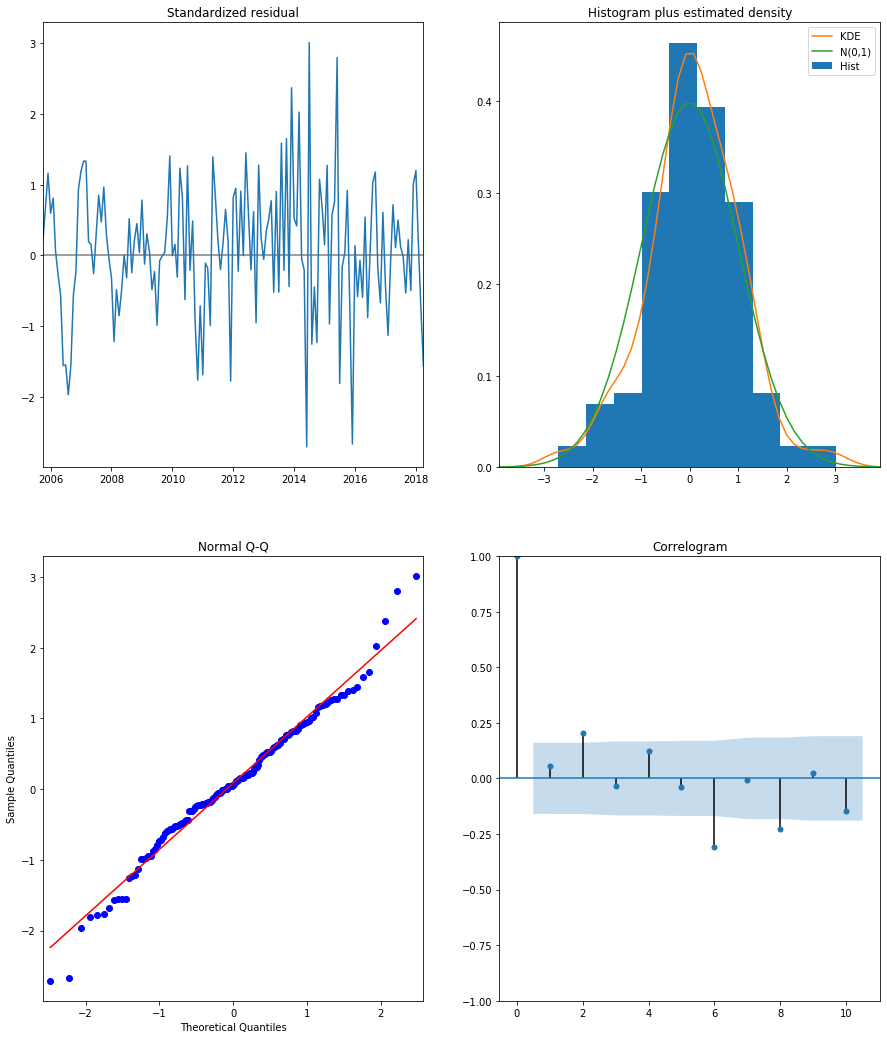

In [177]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Step 6: Interpreting Results